In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/content/cs-training.csv')

In [18]:
df.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [19]:
print(df.shape)
print(df.info())

(150000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  

In [20]:
print(df.isnull().sum())

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [21]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

,proportion
SeriousDlqin2yrs,
0,0.93316
1,0.06684


In [22]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0], inplace=True)

/tmp/ipython-input-962658684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
/tmp/ipython-input-962658684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

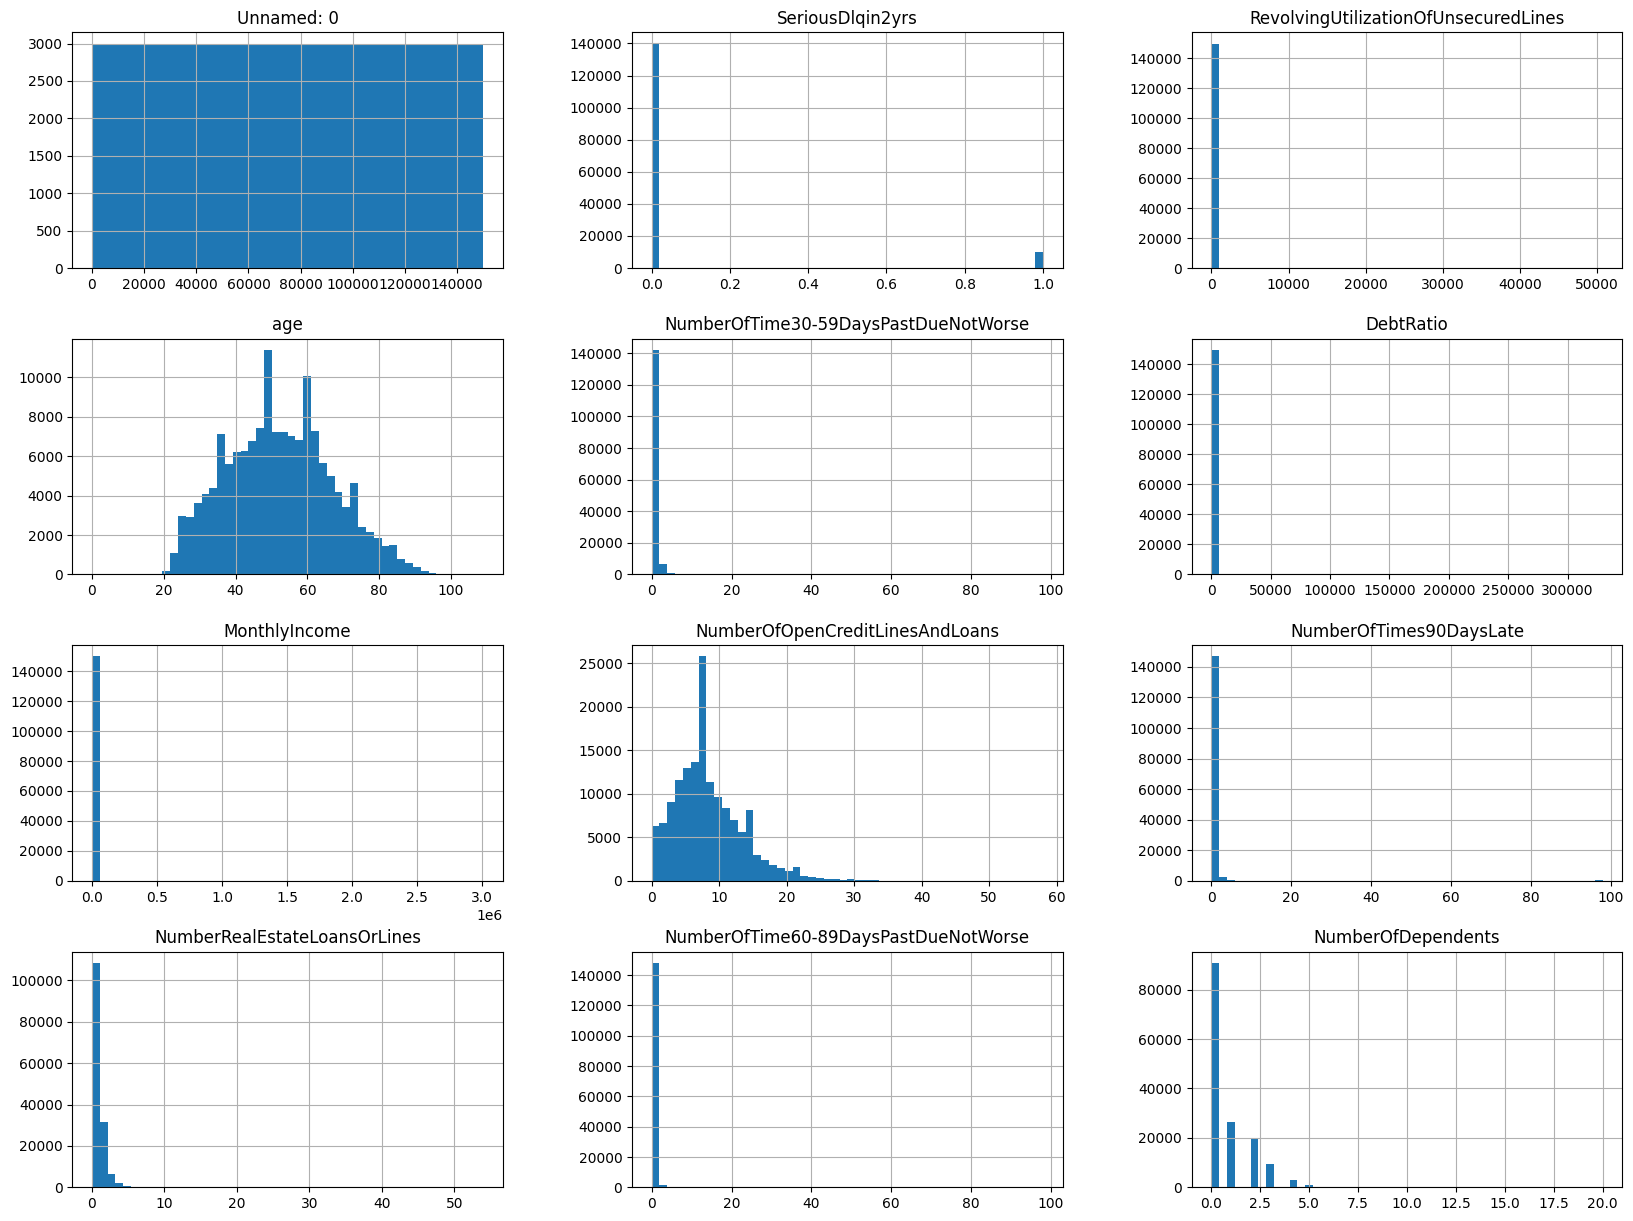

In [23]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

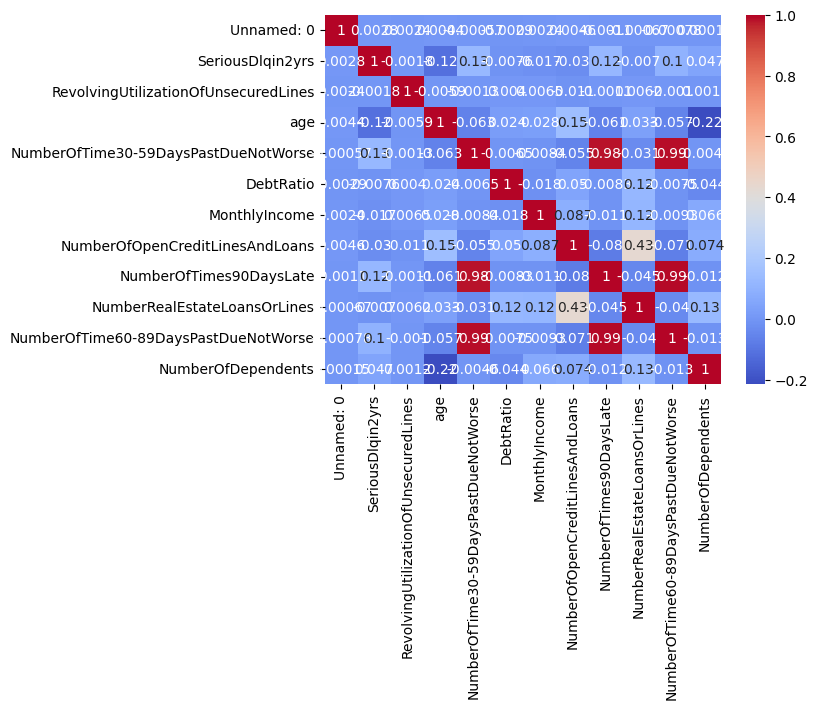

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [25]:
df['TotalPastDue'] = (
    df['NumberOfTime30-59DaysPastDueNotWorse'] +
    df['NumberOfTime60-89DaysPastDueNotWorse'] +
    df['NumberOfTimes90DaysLate']
)

In [26]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'TotalPastDue'],
      dtype='object')

In [27]:
df['NumberOfLoans'] = (
    df['NumberOfOpenCreditLinesAndLoans'] +
    df['NumberRealEstateLoansOrLines']
)

In [28]:
final_cols = [
    'SeriousDlqin2yrs',
    'age',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfDependents',
    'NumberOfLoans',
    'TotalPastDue'
]

df = df[final_cols]

In [29]:
df.head(2)

,SeriousDlqin2yrs,age,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfLoans,TotalPastDue
0,1,45,0.802982,9120.0,2.0,19,2
1,0,40,0.121876,2600.0,1.0,4,0


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(['SeriousDlqin2yrs',], axis=1)
y = df['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# SMOTE oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

In [33]:
# Initialize Random Forest with best parameters
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [34]:
# Train model
model.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [35]:
# Threshold tuning on training set
val_probs = model.predict_proba(X_res)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_res, val_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[best_idx]

In [36]:
print(f"Optimal threshold: {optimal_threshold:.4f} (F1={f1_scores[best_idx]:.4f})")

Optimal threshold: 0.5462 (F1=0.7976)


In [37]:
test_probs = model.predict_proba(X_test_scaled)[:, 1]
test_preds = (test_probs >= optimal_threshold).astype(int)

In [38]:
print(classification_report(y_test, test_preds))
print(f"ROC AUC: {roc_auc_score(y_test, test_probs):.4f}")

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     27995
           1       0.30      0.58      0.40      2005

    accuracy                           0.88     30000
   macro avg       0.64      0.74      0.67     30000
weighted avg       0.92      0.88      0.90     30000

ROC AUC: 0.8391


In [39]:
X_test.sample(5)

,age,DebtRatio,MonthlyIncome,NumberOfDependents,NumberOfLoans,TotalPastDue
8820,81,1687.000000,5400.0,0.0,15,0
85746,39,0.383681,3210.0,0.0,7,0
28919,82,0.004560,8333.0,0.0,6,0
33020,26,0.008120,1600.0,0.0,1,0
103311,61,0.286686,10875.0,1.0,15,0


In [42]:
model.predict([[39,	0.383681,	3210.0,	0.0,	7,	0]])

array([1])